In [33]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image
from datetime import date

from tqdm import tqdm
import os 

# 1. Total number of particle in the stratosphere

In [34]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]
N_year = len(Years)

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [35]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)

# Levs    = [100, 75, 65, 55, 40, 30]
# Heights = [16, 18, 19, 20, 22, 24]
Levs    = [100, 75, 65, 55, 47, 40, 30] # hPa
Heights = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km
# [100, 75, 55, 40, 30]


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = len(Levs) # 16, 18, 20, 22, 24 km

Lats_edge, Lons_edge, Lats_mid, Lons_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 30,
 36,
 180)

In [36]:
# count the particle (injected at different height) number in each grid cell
N_day  = 20*366
Num_2D = np.zeros((N_lat, N_lon, N_lev, N_day)) 


In [37]:
for i_year in tqdm(range(N_year)):
    
    NUMs = np.zeros((N_lon*N_lat*N_day, N_lev))
    
    
    # 6 injection altitudes
    # File1 = open('/n/home12/hongwei/Paper_2/Plot_python/Num_Concnt/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    File1 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    # File = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')

    Lines1 = File1.readlines()
    
    ii = 0
    for line1 in Lines1:
        a1 = line1.split(',')
        NUMs[ii,0] = float(a1[3])
        NUMs[ii,1] = float(a1[4])
        NUMs[ii,2] = float(a1[5])
        NUMs[ii,3] = float(a1[6])
        NUMs[ii,5] = float(a1[7])
        NUMs[ii,6] = float(a1[8])
        ii = ii+1

        
    # 21-km injection (only 19 km is needed here, 21-km is never used in the following)
    File2 = open('/n/home12/hongwei/HONGWEI/Paper_2/Plot_python/21km_post_process/Num_Concnt_21km/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    # File2 = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_Within_15deg/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'_21km.txt', 'r')
    Lines2 = File2.readlines()
    
    ii = 0
    for line2 in Lines2:
        a2 = line2.split(',')
        NUMs[ii,4] = float(a2[3])
        ii = ii+1        

        
    # remap to global (Lon,Lat) mesh
    Num_2D_temp = np.zeros((N_lat, N_lon, N_lev, N_day)) 
    for i_day in range(N_day):
        for ix in range(N_lon):
            for iy in range(N_lat):
                ii = i_day*(N_lat*N_lon) + ix*N_lat + iy
                Num_2D_temp[iy, ix, :, i_day] = NUMs[ii,:]
               
            
    Num_2D = Num_2D + Num_2D_temp            
    
print(ii)


100%|██████████| 10/10 [03:37<00:00, 21.76s/it]

7905599


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!

In [38]:
# change (-20,20) to (20,-20)

print("LAT Before: ", Lats_mid)

if Lats_mid[0]<Lats_mid[-1]:
    Lats_edge = Lats_edge[::-1]
    Lats_mid = Lats_mid[::-1]
    Num_2D[:, :, :, :] = Num_2D[::-1, :, :, :]

print("LAT After: ", Lats_mid)


LAT Before:  [-87 -81 -75 -69 -63 -57 -51 -45 -39 -33 -27 -21 -15  -9  -3   3   9  15
  21  27  33  39  45  51  57  63  69  75  81  87]
LAT After:  [ 87  81  75  69  63  57  51  45  39  33  27  21  15   9   3  -3  -9 -15
 -21 -27 -33 -39 -45 -51 -57 -63 -69 -75 -81 -87]


In [39]:
Num_2D_new = Num_2D


In [40]:
# monthly data
# To simplify, assume all months have 30 days

N_month = 20*12

Num_2D_month = np.zeros((N_lat, N_lon, N_lev, N_month))

for i_mon in range(N_month):
    Num_2D_month[:,:,:,i_mon] = np.mean(Num_2D_new[:,:,:,i_mon*30:(i_mon+1)*30], axis=3)


In [41]:
import matplotlib.font_manager
import matplotlib
from matplotlib.font_manager import findfont, FontProperties
print(matplotlib.get_cachedir()) # should return something like ~/.matplotlib
font = findfont(FontProperties(family=['sans-serif']))

/n/home12/hongwei/.cache/matplotlib


(7, 240)


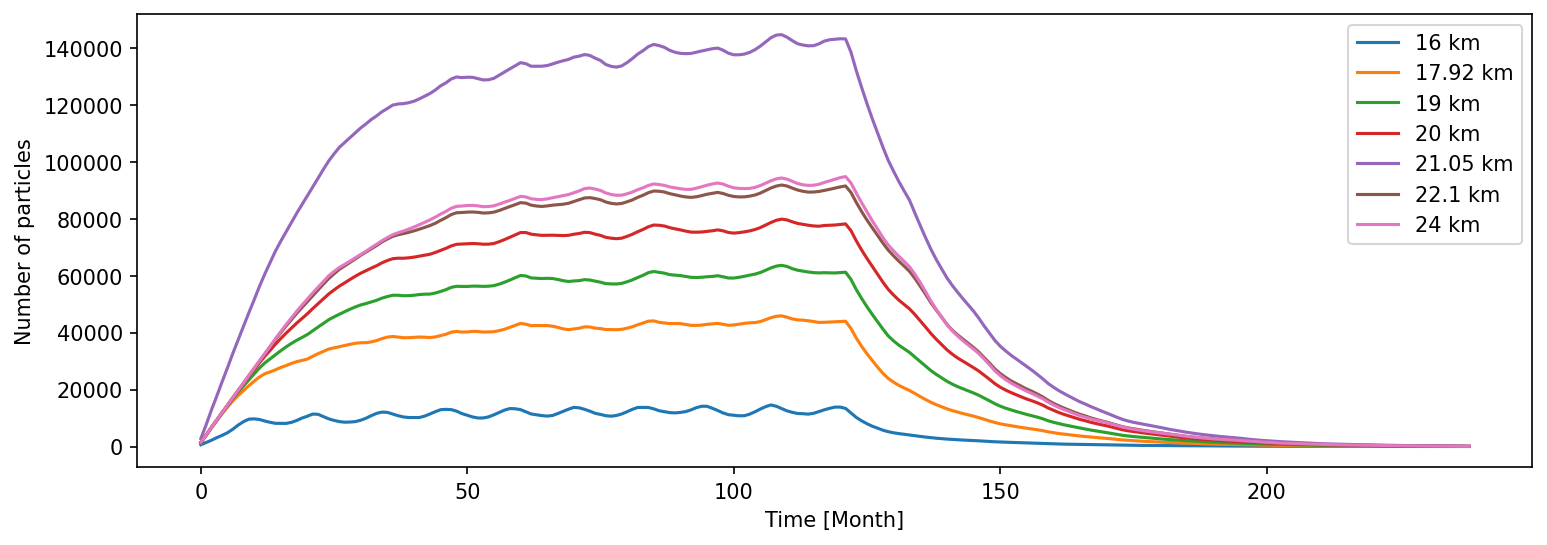

In [42]:
#------------------------------------------------------------------
# plot the time series of the total particle number

iday_begin = 0
iday_end = -1

total_num_month = np.sum( Num_2D_month, axis=(0,1) )
print(total_num_month.shape)

#
fig = plt.figure(figsize=(12,4), dpi=150)

imon_begin = 0
imon_end = -1

plt.plot(total_num_month[0,iday_begin:iday_end], label=f"{Heights[0]} km")
plt.plot(total_num_month[1,iday_begin:iday_end], label=f"{Heights[1]} km")
plt.plot(total_num_month[2,iday_begin:iday_end], label=f"{Heights[2]:.0f} km")
plt.plot(total_num_month[3,iday_begin:iday_end], label=f"{Heights[3]:.0f} km")
plt.plot(total_num_month[4,iday_begin:iday_end], label=f"{Heights[4]} km")
plt.plot(total_num_month[5,iday_begin:iday_end], label=f"{Heights[5]} km")
plt.plot(total_num_month[6,iday_begin:iday_end], label=f"{Heights[6]} km")


# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Time [Month]")
plt.ylabel("Number of particles")


plt.legend();

In [43]:
#  get 2005.1 - 2009.12

# 19 km
Num_Month_19km = total_num_month[2,5*12:10*12]

Num_Month_19km.shape

(60,)

# 2. QBO index

In [44]:
import pywt
import scipy.signal as Signal
# from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image


In [45]:

# QBO for singapore obs data:
# https://acd-ext.gsfc.nasa.gov/Data_services/met/qbo/QBO_Singapore_Uvals_GSFC.txt
df = pd.read_fwf('../QBO_Singapore_index.txt', sep=" ")

# get 2005.1 - 2009.12
idx1 = (2005-1979)*12
df2 = df.iloc[idx1:idx1+5*12]

df2.head()

,Month,Year,100,90,80,70,50,40,30,20,15,10
312,1,2005,-2.53,-1.13,-2.62,0.50,5.38,9.65,-1.64,-28.39,-28.37,-25.98
313,2,2005,2.60,0.68,-0.35,1.95,9.88,11.87,1.67,-29.76,-30.79,-31.41
314,3,2005,-8.15,-4.47,1.75,7.71,14.51,15.05,-1.02,-29.72,-33.98,-34.78
315,4,2005,-0.50,-0.18,0.88,2.79,8.16,5.73,-18.22,-32.82,-34.12,-35.27
316,5,2005,-9.23,-8.89,-0.62,6.73,8.36,-8.09,-26.69,-33.13,-34.52,-37.37


In [46]:
df2.tail()

,Month,Year,100,90,80,70,50,40,30,20,15,10
367,8,2009,-15.89,-5.79,3.54,5.83,8.10,1.92,-22.02,-33.52,-36.59,-11.04
368,9,2009,-10.40,0.56,3.53,7.03,11.10,4.74,-22.04,-34.81,-37.32,-22.16
369,10,2009,-6.75,1.45,6.86,9.26,10.63,2.40,-20.16,-35.38,-38.95,-17.39
370,11,2009,-2.48,2.23,4.87,6.88,8.53,-4.48,-25.24,-33.30,-37.02,-4.97
371,12,2009,-5.73,-3.89,1.12,6.37,10.21,-5.35,-26.05,-33.54,-37.53,-10.73


[[1.         0.48793457]
 [0.48793457 1.        ]]
[[ 1.         -0.34746922]
 [-0.34746922  1.        ]]


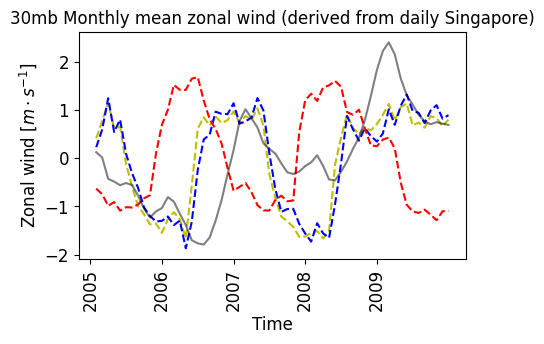

In [47]:
U20 = df2['20']
U40 = df2['40']
U50 = df2['50']
U70 = df2['70']
U80 = df2['80']
U90 = df2['90']
U_total = (U50+U70)/2
U_shear = U20-U70

month = np.arange(1,len(U50)+1,1)

fig = plt.figure(figsize=(5,3),dpi=100)

data40 = (U40 - np.mean(U40))/np.std(U40)
data50 = (U50 - np.mean(U50))/np.std(U50)
data70 = (U70 - np.mean(U70))/np.std(U70)
data80 = (U80 - np.mean(U80))/np.std(U80)
data90 = (U90 - np.mean(U90))/np.std(U90)
data_total = (U_total - np.mean(U_total))/np.std(U_total)
data_shear = (U_shear - np.mean(U_shear))/np.std(U_shear)

data2 = (Num_Month_19km - np.mean(Num_Month_19km))/np.std(Num_Month_19km)

# plt.plot(month, data40, 'k--')
plt.plot(month, data50, 'y--')
# plt.plot(month, data70, 'y--')
# plt.plot(month, data80, 'g--')
# plt.plot(month, data90, 'r--')

plt.plot(month, data_total, 'b--')
plt.plot(month, data_shear, 'r--')

plt.plot(month, data2, 'k-', alpha=0.5)


tick_locs = np.arange(0,len(month),12)
tick_lbls = np.arange(2005,2010,1)
plt.xticks(tick_locs, tick_lbls, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)


plt.title('30mb Monthly mean zonal wind (derived from daily Singapore)', fontsize=12)
plt.ylabel('Zonal wind [$m \cdot s^{-1}$]', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.legend(loc='lower left');

print(np.corrcoef(U50, Num_Month_19km))
print(np.corrcoef(U20-U70, Num_Month_19km))

In [48]:
# matplotlib.get_cachedir()

In [49]:
# detrand
Num_Month_19km_detrend = Signal.detrend(Num_Month_19km)
print(Num_Month_19km_detrend.shape)

# deseasonal
N_total = len(Num_Month_19km_detrend)
Num_Month_19km_detrend_deseason = 0.0*Num_Month_19km_detrend

for idx in range(N_total):
    idx2 = idx % 12
    Num_Month_19km_detrend_deseason[idx] = Num_Month_19km_detrend[idx] \
                                         - np.mean(Num_Month_19km_detrend[idx2:N_total:12])

(60,)


[[1.         0.48793457]
 [0.48793457 1.        ]]
[[1.         0.39783859]
 [0.39783859 1.        ]]
[[1.         0.49355557]
 [0.49355557 1.        ]]


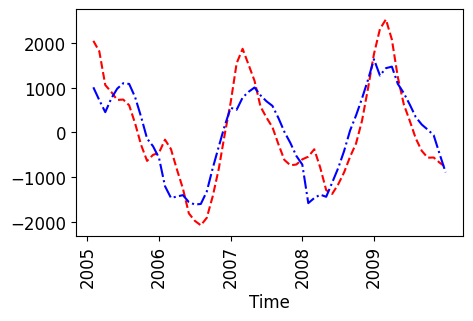

In [50]:
fig = plt.figure(figsize=(5,3),dpi=100)

# plt.plot(month, Num_Month_19km, 'k-')
plt.plot(month, Num_Month_19km_detrend, 'r--')
plt.plot(month, Num_Month_19km_detrend_deseason, 'b-.')


tick_locs = np.arange(0,len(month),12)
tick_lbls = np.arange(2005,2010,1)
plt.xticks(tick_locs, tick_lbls, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)


# plt.title('30mb Monthly mean zonal wind (derived from daily Singapore)', fontsize=12)
# plt.ylabel('Zonal wind [$m \cdot s^{-1}$]', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.legend(loc='lower left');

print(np.corrcoef(U50, Num_Month_19km))
print(np.corrcoef(U50, Num_Month_19km_detrend))
print(np.corrcoef(U50, Num_Month_19km_detrend_deseason))

In [51]:
# calculate the increaseing rate

Num_Month_19km_line = Num_Month_19km-Num_Month_19km_detrend

(Num_Month_19km_line[2]-Num_Month_19km_line[1])*12/1e5,Num_Month_19km_line[51]-Num_Month_19km_line[50]
# plt.plot(Num_Month_19km_detrend)

(0.007549306362878415, 62.91088635732012)

[[1.         0.89954456]
 [0.89954456 1.        ]]
[[1.         0.89954456]
 [0.89954456 1.        ]]
[[1.         0.81628443]
 [0.81628443 1.        ]]
[[ 1.        -0.8579775]
 [-0.8579775  1.       ]]
[[1.         0.76343861]
 [0.76343861 1.        ]]


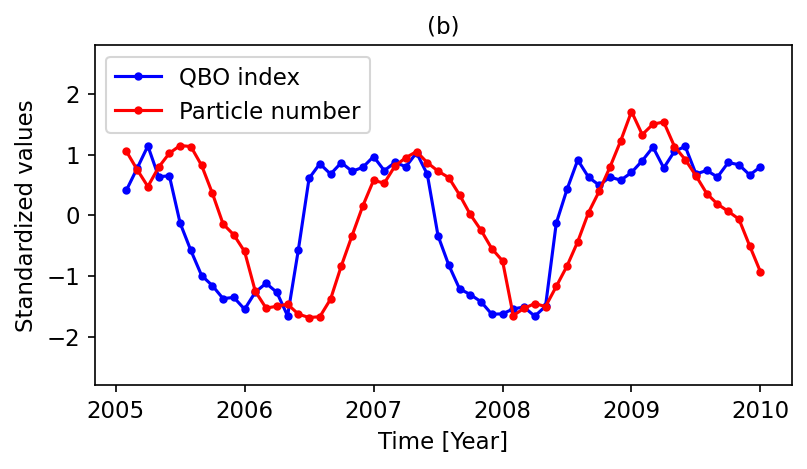

In [52]:
#

fig = plt.figure(figsize=(6,3),dpi=150)
# fig = plt.figure(figsize=(10,5),dpi=100
data40 = (U40 - np.mean(U40))/np.std(U40)

data50 = (U50 - np.mean(U50))/np.std(U50)
data70 = (U70 - np.mean(U70))/np.std(U70)
data80 = (U80 - np.mean(U80))/np.std(U80)
data90 = (U90 - np.mean(U90))/np.std(U90)

data_total = (U_total - np.mean(U_total))/np.std(U_total)

data_num = (Num_Month_19km_detrend_deseason - np.mean(Num_Month_19km_detrend_deseason))\
        /np.std(Num_Month_19km_detrend_deseason)

# plt.plot(month, data70, 'b.-', label='QBO index')

plt.plot(month, data50, 'b.-', label='QBO index')
# plt.plot(month, data_shear, 'y--', label='QBO shear')
# plt.plot(month, data50, 'g--', label='QBO index 80hPa')
plt.plot(month, data_num, 'r.-', alpha=1, label='Particle number')

tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
plt.xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
plt.title('(b)', fontsize=11)
plt.ylabel('Standardized values', fontsize=11)
plt.xlabel('Time [Year]', fontsize=11)
plt.legend(loc='upper left', fontsize=11);

# print(np.corrcoef(U40, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U50, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U70, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U80, Num_Month_19km_detrend_deseason))
# print(np.corrcoef(U90, Num_Month_19km_detrend_deseason))

mon_lag = 10
print(np.corrcoef(data_shear[0:60-mon_lag], data_num[mon_lag:60]))

mon_lag = 10
print(np.corrcoef(data_shear[0:60-mon_lag], data_num[mon_lag:60]))

print(np.corrcoef(data50[0:57], data_num[3:60]))
print(np.corrcoef(data50[0:45], data_num[15:60]))
print(np.corrcoef(data50[0:55], data_num[5:60]))


In [53]:
data_total.shape

(60,)

# 3. Downward particle flux

In [54]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)
Levs_edge = np.arange(75,450,50)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)
Levs_mid = np.arange(100,450,50)


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = len(Levs_mid) 

Lats_edge, Lons_edge, Levs_edge, Lats_mid, Lons_mid, Levs_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([ 75, 125, 175, 225, 275, 325, 375, 425]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 array([100, 150, 200, 250, 300, 350, 400]),
 30,
 36,
 180)

In [55]:
# calculate the area of lon-lat grid [km^2]
def Area_Lat_Weghted(lat1, lat2, d_lon):
    # A = π R² (sin φ1 − sin φ2) (θ1 − θ2)/180.
    Re = 6378 # km
    Area = math.pi * Re**2 * abs(np.sin(np.deg2rad(lat1))-np.sin(np.deg2rad(lat2))) * d_lon/180
    return Area

In [56]:
Grid_area = np.zeros((N_lat, N_lon))

for iy in range(N_lat):
    Grid_area[iy,:] = Area_Lat_Weghted( Lats_edge[iy], Lats_edge[iy+1], abs(Lons_mid[1]-Lons_mid[0]) )

In [57]:

Total_Mon = 20*12
Sink_num = np.zeros((N_lat, N_lon, N_lev, Total_Mon))

File = open('/n/home12/hongwei/Paper_3_QBO/Sink_locations/Num_Sinks_Within_15deg_19km.txt', 'r')

Lines = File.readlines()

Months = []
Lons = []
Lats = []
Sink0 = []
Sink1 = []
Sink2 = []
Sink3 = []
Sink4 = []
Sink5 = []
Sink6 = []

for line in Lines:
    a = line.split(',')
    Months.append(float(a[0]))
    Lons.append(float(a[1]))
    Lats.append(float(a[2]))
    
    Sink0.append(float(a[3]))
    Sink1.append(float(a[4]))
    Sink2.append(float(a[5]))
    Sink3.append(float(a[6]))
    Sink4.append(float(a[7]))
    Sink5.append(float(a[8]))
    Sink6.append(float(a[9]))
    
i = 0
for i_MON in range(Total_Mon):
    for ix in range(N_lon):
        for iy in range(N_lat):
            Sink_num[iy, ix, :, i_MON]=np.array([Sink0[i],Sink1[i],Sink2[i],Sink3[i],Sink4[i],Sink5[i],Sink6[i]])
            i = i+1

Sink_num.shape

    
    

(30, 36, 7, 240)

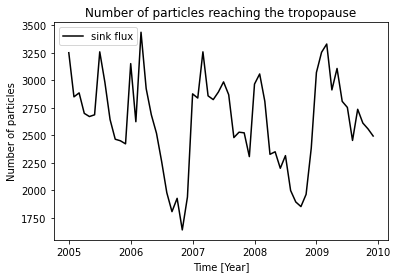

In [58]:
sink_num_month = np.sum( Sink_num, axis=(0,1,2) )

imon_begin = 5*12
imon_end = 10*12

sink_num_month_5yr = sink_num_month[imon_begin:imon_end]

plt.plot(sink_num_month[imon_begin:imon_end], 'k', label=f"sink flux")

plt.xlabel("Time [Year]")
plt.ylabel("Number of particles")
plt.title("Number of particles reaching the tropopause")

plt.xticks(np.arange(0,5*12+1,12), ['2005', '2006', '2007', '2008', '2009', '2010'], rotation=0) 

plt.legend();


In [59]:
##### detrend
sink_num_month_5yr_detrend = Signal.detrend(sink_num_month_5yr)

# deseasonal
N_total = len(sink_num_month_5yr_detrend)
sink_num_month_5yr_detrend_deseason = 0.0*sink_num_month_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_5yr_detrend_deseason[idx] = sink_num_month_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_5yr_detrend[idx2:N_total:12])

In [60]:
def moving_average(X):
    N = len(X)
    X_new = X*0.0
    
    for i in range(N):
        if i==0:
            print(X_new[0])
            X_new[0] = (X[0] + X[1]) /2
        elif i==N-1:
            X_new[N-1] = (X[N-1] + X[N-2]) /2
        else:
            X_new[i] = (X[i-1] + X[i] + X[i+1]) /3
    
    return X_new
    
    

In [61]:
# data_sink

0.0
0.0
0.0


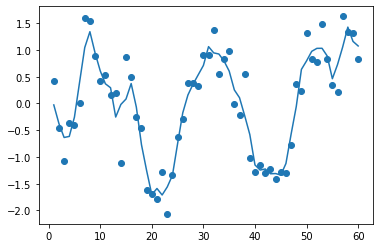

In [62]:
data50 = np.array(data50)
data50_smooth = moving_average(data50)

data_sink_smooth = moving_average(data_sink)

data_num_smooth = moving_average(data_num)

plt.scatter(month, data_sink)
plt.plot(month, data_sink_smooth)

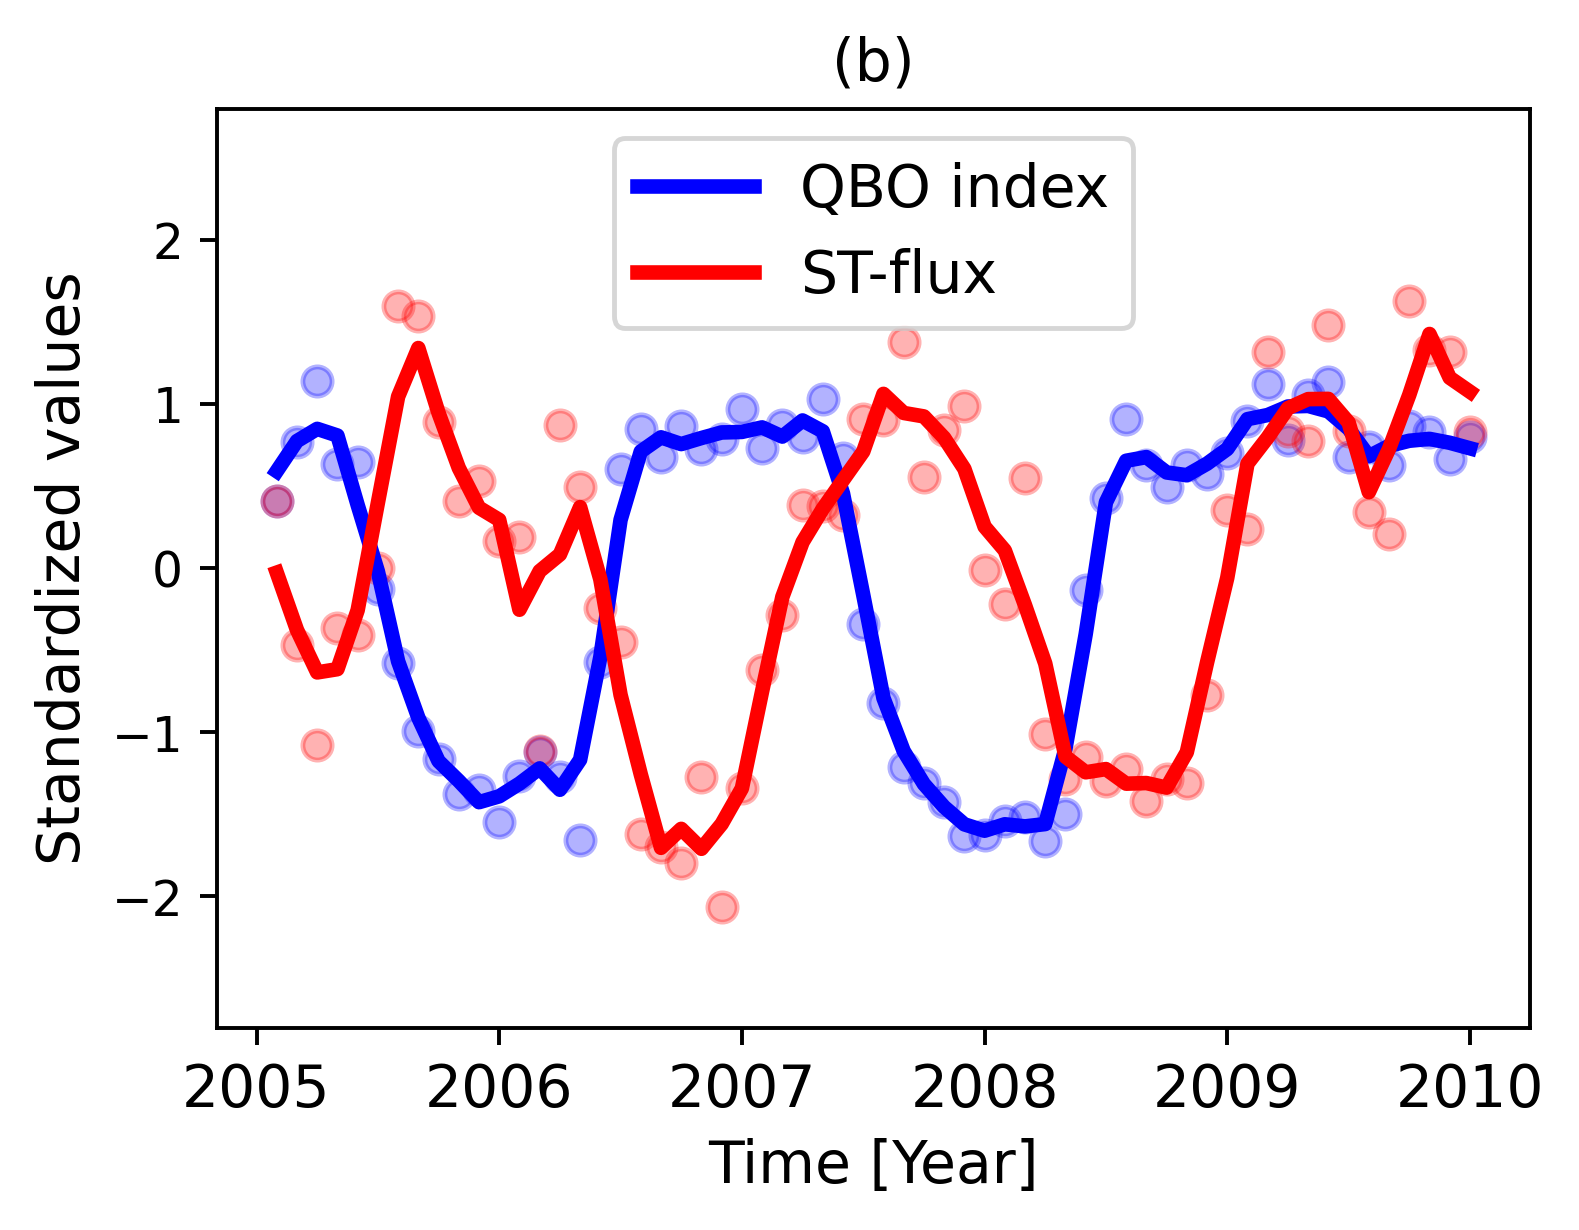

In [81]:
U50 = df2['50']
U_shear = df2['20'] - df2['70']


month = np.arange(1,len(U50)+1,1)

fig = plt.figure(figsize=(5,3.5),dpi=350)

data50 = (U50 - np.mean(U50))/np.std(U50)
data_shear = (U_shear - np.mean(U_shear))/np.std(U_shear)
data_sink = (sink_num_month_5yr_detrend_deseason - np.mean(sink_num_month_5yr_detrend_deseason))/np.std(sink_num_month_5yr_detrend_deseason)

bx = plt.axes([0.17, 0.15, 0.75, 0.75])

bx.scatter(month, data50, color='b', alpha=0.3)
bx.plot(month, data50_smooth, 'b-', linewidth=3, label='QBO index')
# plt.plot(month, data_shear, 'b--', label='QBO shear')
bx.scatter(month, data_sink, color='r', alpha=0.3)
bx.plot(month, data_sink_smooth, 'r-', linewidth=3, label='ST-flux')
# plt.plot(month, data70, 'k--', label='QBO index 70hPa')
# plt.plot(month, data80, 'c--', label='QBO index 80hPa')
# plt.plot(month, data90, 'b--', label='QBO index 80hPa')
# plt.plot(month, data_num, 'r-', alpha=1, label='Particle number')


tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
bx.set_xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=12)
# bx.set_ylabel(fontsize=12)
bx.set_ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
bx.set_title('(b)', fontsize=12)
bx.set_ylabel('Standardized values', fontsize=12)
bx.set_xlabel('Time [Year]', fontsize=12)
bx.legend(loc='upper center', fontsize=12);

# plt.tight_layout()

plt.savefig("Figure_2b.jpg")

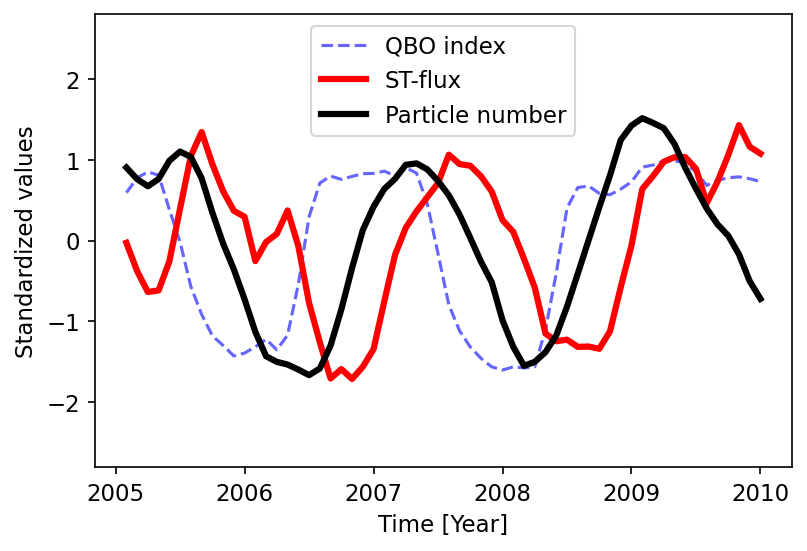

In [64]:
#

fig = plt.figure(figsize=(6,4),dpi=150)
# fig = plt.figure(figsize=(10,5),dpi=100

data_total = (U_total - np.mean(U_total))/np.std(U_total)

data_num = (Num_Month_19km_detrend_deseason - np.mean(Num_Month_19km_detrend_deseason))\
        /np.std(Num_Month_19km_detrend_deseason)

plt.plot(month, data50_smooth, 'b--', alpha=0.6, label='QBO index')
plt.plot(month, data_sink_smooth, 'r-', linewidth=3, label='ST-flux')
plt.plot(month, data_num_smooth, 'k-', linewidth=3, label='Particle number')

tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
plt.xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
# plt.title('(b)', fontsize=11)
plt.ylabel('Standardized values', fontsize=11)
plt.xlabel('Time [Year]', fontsize=11)
plt.legend(fontsize=11);

In [65]:
D_mon = 7
print(np.corrcoef(data_shear[0:60-D_mon], data50[D_mon:60]))

[[1.         0.83929365]
 [0.83929365 1.        ]]


In [66]:
D_mon = 4+12
print(np.corrcoef(data_shear[0:60-D_mon], data_sink[D_mon:60]))

D_mon = 12
print(np.corrcoef(data_shear[0:60-D_mon], data_num[D_mon:60]))

D_mon = 4
print(np.corrcoef(data_num[0:60-D_mon], data_sink[D_mon:60]))

[[1.         0.80201821]
 [0.80201821 1.        ]]
[[1.         0.82831256]
 [0.82831256 1.        ]]
[[1.         0.81977708]
 [0.81977708 1.        ]]


In [67]:
D_mon = 7
print(np.corrcoef(data50[0:60-D_mon], data_sink[D_mon:60]))

D_mon = 3
print(np.corrcoef(data50[0:60-D_mon], data_num[D_mon:60]))

D_mon = 4
print(np.corrcoef(data_num[0:60-D_mon], data_sink[D_mon:60]))

[[1.         0.80611027]
 [0.80611027 1.        ]]
[[1.         0.81628443]
 [0.81628443 1.        ]]
[[1.         0.81977708]
 [0.81977708 1.        ]]


# ENSO index (MEI)

In [ ]:
File1 = open('/n/home12/hongwei/Paper_3_QBO/ENSO/Multivariate_ENSO_Index_read.txt', 'r')
        
Lines1 = File1.readlines()

N_yr = 2022-1979+1
N_mon = 12

MEI = np.zeros((N_mon, N_yr))

# Strips the newline character
iyr=0
i = 1
for line1 in Lines1:
    if i>=2:
        iyr = i-2
        if iyr>N_yr-1: break
        a1 = line1.split(',')
        
        for j in range(1,len(a1)):
            imon = j-1
            MEI[imon,iyr] = float(a1[j])
    
    i = i+1
    

In [ ]:
df = pd.read_fwf('/n/home12/hongwei/Paper_3_QBO/ENSO/Multivariate_ENSO_Index.txt', sep=" ", header=None)

df.head()

In [ ]:
# get 2005.1 - 2009.12
idx1 = 2005-1979
df2 = df.iloc[idx1:idx1+5]

df2

In [ ]:

MEI_index =   list(df2.iloc[0][1::].values) \
            + list(df2.iloc[1][1::].values) \
            + list(df2.iloc[2][1::].values)\
            + list(df2.iloc[3][1::].values)\
            + list(df2.iloc[4][1::].values)

MEI_index = np.array(MEI_index)

# MEI_index

In [ ]:
#

# fig = plt.figure(figsize=(5,3),dpi=100)
fig = plt.figure(figsize=(10,5),dpi=100)

MEI_index = (MEI_index - np.mean(MEI_index))/np.std(MEI_index)

data70 = (U70 - np.mean(U70))/np.std(U70)


data2 = (Num_Month_19km_detrend_deseason - np.mean(Num_Month_19km_detrend_deseason))\
        /np.std(Num_Month_19km_detrend_deseason)

plt.plot(month, data70, 'b.', )
plt.plot(month, data70, 'b-', label='QBO index')
plt.plot(month, MEI_index, 'y--', label='MEI_index')
# plt.plot(month, data80, 'g--', label='QBO index 80hPa')
plt.plot(month, data2, 'r.')
plt.plot(month, data2, 'r-', alpha=1, label='Particle number')


tick_locs = np.arange(0,len(month)+1,12)
tick_lbls = np.arange(2005,2011,1)
plt.xticks(tick_locs, tick_lbls, rotation='horizontal', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-2.8,2.8)

# 50mb Monthly mean zonal wind (derived from daily Singapore
plt.title('(b)', fontsize=11)
plt.ylabel('Standerdized values', fontsize=11)
plt.xlabel('Time [Year]', fontsize=12)
plt.legend(loc='upper left', fontsize=11);

print(np.corrcoef(U70, Num_Month_19km_detrend))
print(np.corrcoef(MEI_index, Num_Month_19km_detrend))


# Wavelet & Fourier Analysis

https://towardsdatascience.com/wavelet-fourier-analysis-on-the-enso-and-monsoon-data-in-python-31504eeadc2c

In [ ]:

# plt.style.use('seaborn')

In [ ]:
total_num_month.shape, data50.shape

In [ ]:
iz = 2

imon_begin = 12*5 # 2005
imon_end = 12*10+1 # 2010

# for particle number
df_nino = np.array(total_num_month[iz,imon_begin:imon_end])
# for QBO
df_nino = np.array(data50)

N = len(df_nino)
t0 = 2005
dt = 1/12 # [year]
time = np.arange(0, N) * dt + t0

signal = df_nino #to get the scalar values
# signal = signal - np.mean(signal)
signal = Signal.detrend(signal)

scales = np.arange(1, 128) #set the wavelet scales

def plot_signal(time, signal, average_over=5, figname=None):
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(time, signal, label='signal')
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    # ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    if not figname:
        plt.savefig('signal_plot.png', dpi=200, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=200, bbox_inches='tight')
    plt.close('all')

plot_signal(time, signal) #plot and label the axis

Image('signal_plot.png') 

In [ ]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = np.fft.fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal, figname=None):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    fig, ax = plt.subplots(2, 1, figsize=(15, 3), sharex=True)
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2  # FFT power spectrum
    ax[0].plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax[1].plot(f_values, fft_power, 'k--',
               linewidth=1, label='FFT Power Spectrum')
    ax[1].set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax[1].set_ylabel('Amplitude', fontsize=12)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].legend()
    ax[1].legend()
    # plt.subplots_adjust(hspace=0.5)
    if not figname:
        plt.savefig('fft_plus_power.png', dpi=300, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    plt.close('all')

plot_fft_plus_power(time, signal)

Image('fft_plus_power.png') 

In [ ]:
def plot_wavelet(time, signal, scales, waveletname='cmor1.5-1.0', cmap=plt.cm.Reds, \
                 title=f'(a)', \
                 ylabel='Period (years)', xlabel='Time [Year]', figname=None):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    
    idx1 = 5
    idx2 = 49
    
    period2 = period[idx1:idx2]
    power2 = power[idx1:idx2,:]
    

    print(period[idx1:idx2])
    print(period[idx1:idx2].shape)
    print(coefficients[idx1:idx2,:].shape)
    
    scale0 = 8*8*8*8*8*8
    numlevels = 8

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)
#         print()

    contourlevels = np.log2(levels)
    
#     print(contourlevels)
    
    fig, ax = plt.subplots(figsize=(5, 3))
    im = ax.contourf(time, np.log2(period2), np.log2(power2),
                     extend='both', cmap=cmap)
    
    ax.set_title(title, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_xlabel(xlabel, fontsize=11)
    
    yticks = 2**np.arange(np.ceil(np.log2(period2.min())),
                          np.ceil(np.log2(period2.max())))
    
#     yticks = 2**np.arange(np.ceil(np.log2(0.5)),
#                           np.ceil(np.log2(5.0)))
    
#     print(period2.min(), period2.max())
#     print(np.log2(period2.min()), np.log2(period2.max()))
#     print(np.ceil(np.log2(period2.min())), np.ceil(np.log2(period2.max())))
    
    ax.set_yticks(np.log2(yticks))
#     print(yticks, np.log2(yticks))
    
    ax.set_yticklabels(yticks, fontsize=11)
    ax.set_xticklabels([2005,2006,2007,2008,2009,2010], fontsize=11)
    
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
#     ax.set_xlim(time[0], time[-1])
    print(time)
    
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical", label='Power')
    
    if not figname:
        plt.savefig('wavelet_{}.png'.format(waveletname),
                    dpi=300, bbox_inches='tight')
    else:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    plt.close('all')

plot_wavelet(time, signal, scales)

Image('wavelet_cmor1.5-1.0.png')

# wavelet transform with significant test

In [ ]:
# !pip install waipy
import waipy

In [ ]:
iz = 2

imon_begin = 12*5 # 2005
imon_end = 12*10+1 # 2010

df_nino = np.array(total_num_month[iz,imon_begin:imon_end])

N = len(df_nino)
T1 = 2005
dt = 1/12 # [year]
time = np.arange(0, N) * dt + t0

signal = df_nino #to get the scalar values
# signal = signal - np.mean(signal)
data = Signal.detrend(signal)

# scales = np.arange(1, 128) #set the wavelet scales

In [ ]:

# N =504      # the time series of length N.
# dt = 1/4    # amount of time between each time series value, i.e. the sampling time.
#             # seasonal data 1/4 year - 4 measures in 1 year
# T1 = 1871.  # start time

# time = np.arange(0, N) * dt + T1

# bias = np.random.randint(100, size=(1, N))
# data = np.sin(time) + bias[0]/50

# len(time), len(data), len(bias[0])

In [ ]:
len(time), len(data)


In [ ]:
data_norm = waipy.normalize(data)


In [ ]:
pad = 1         # pad the time series with zeroes (recommended)

dj = 0.25       # this will do 4 sub-octaves per octave

s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
s0 = dt

j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
j1 = 1

lag1 = 0.72     # lag-1 autocorrelation for red noise background
lag1 = 1.44

param = 6
param = 1

mother = 'Morlet'
# dt = 1/4.

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Nino3')
#waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)

In [ ]:
var='NINO3 Sea Surface Temperature (seasonal)'
#time from waipy.load_txt 
#data normalize

dtmin = 0.25/8    # dt/n of suboctaves
dtmin = 0.5

waipy.wavelet_plot(var, time, data_norm, dtmin, result)

# 3. PyCWT

https://pycwt.readthedocs.io/en/latest/tutorial.html#time-series-spectral-analysis-using-wavelets

In [ ]:
# !pip install pycwt

In [ ]:
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [ ]:
# url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
# dat = numpy.genfromtxt(url, skip_header=19) 
# title = 'NINO3 Sea Surface Temperature'
# label = 'NINO3 SST'
# units = 'degC'

# t0 = 1871.0
# dt = 0.25  # In years

# N = dat.size
# t = numpy.arange(0, N) * dt + t0

In [ ]:
iz = 2

imon_begin = 12*5 # 2005
imon_end = 12*10+1 # 2010

df_nino = np.array(total_num_month[iz,imon_begin:imon_end])
dat0 = df_nino
dat0 = dat0 - np.mean(dat0)
dat0 = Signal.detrend(dat0)
dat = np.hstack((dat0, dat0)) #to get the scalar values

title = 'Number of particles in the stratosphere'
label = 'Particle number'
units = '#'

t0 = 2005
dt = 1/12 # [year]

N = len(dat)
t = np.arange(0, N) * dt + t0

# scales = np.arange(1, 128) #set the wavelet scales
N

In [ ]:
plt.plot(dat)

In [ ]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [ ]:
plt.plot(dat_norm)

In [ ]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [ ]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [ ]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [ ]:
power /= scales[:, None]

In [ ]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [ ]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [ ]:
yr1 = 1
yr2 = 4

sel = find((period >= yr1) & (period < yr2))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

In [ ]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis) 

extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)

bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')

bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--') # significant contour line
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc') 
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(yr1, yr2))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()